In [352]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
from torch.nn import functional as fnn

from train import main

In [353]:
#!g1.1

loss_fn = fnn.l1_loss

request = Namespace(
    name=f'resnext50_l1_loss_CyclicLR_16000_10_UpdatedDataNoDispersionNoBias',
    data_folder='data',
    data_size=16_000,
    crop_size=256,
    batch_size=64,
    epochs=10,
    learning_rate=0.001,
    gpu=True,
    worker=1
)
main(request, loss_fn)

Reading data (clean)...
Super clean data!


load landmarks...:  81%|████████  | 12965/16000 [00:00<00:00, 129427.33it/s]

Super clean data!


load landmarks...: 100%|██████████| 16000/16000 [00:01<00:00, 9063.45it/s]  


Creating model resnext50_32x4d...


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth



Tune optimizer...
Use l1 loss!
Ready for training...


validation...:  73%|███████▎  | 33/45 [00:10<00:03,  3.08it/s]

Epoch # 0:	train loss: 1.2e+02	val loss: 1.6e+04


validation...: 100%|██████████| 45/45 [00:12<00:00,  3.61it/s]


Epoch # 1:	train loss: 1e+02	val loss: 6.3e+03


validation...: 100%|██████████| 45/45 [00:12<00:00,  3.74it/s]


Epoch # 2:	train loss: 2.8e+01	val loss: 1.8e+02


validation...:  98%|█████████▊| 44/45 [00:12<00:00,  3.40it/s]

Epoch # 3:	train loss:   8.6	val loss: 1.8e+02


validation...: 100%|██████████| 45/45 [00:13<00:00,  3.45it/s]

Epoch # 4:	train loss:   6.6	val loss: 8.4e+01



validation...: 100%|██████████| 45/45 [00:12<00:00,  3.62it/s]


Epoch # 5:	train loss:   6.3	val loss: 7.9e+01


validation...:  91%|█████████ | 41/45 [00:11<00:01,  3.51it/s]

Epoch # 6:	train loss:   5.9	val loss: 6.8e+01


validation...:  56%|█████▌    | 25/45 [00:07<00:05,  3.39it/s]

Epoch # 7:	train loss:   4.9	val loss: 4.1e+01


validation...:  93%|█████████▎| 42/45 [00:11<00:00,  3.51it/s]

Epoch # 8:	train loss:   4.2	val loss: 5.5e+01


validation...: 100%|██████████| 45/45 [00:12<00:00,  3.61it/s]


Epoch # 9:	train loss:   3.9	val loss: 2.5e+01


(0.0, 200.0)

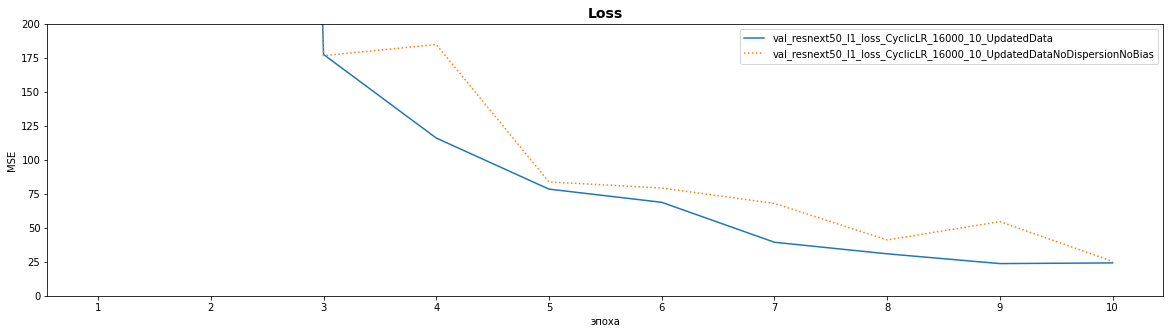

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [356]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment in [
#     'resnext50_wing_loss_w4_e2_CyclicLR_16000_10_UpdatedData',
#     'resnext50_wing_loss_w4_e3_CyclicLR_16000_10_UpdatedData',
#     'resnext50_wing_loss_w6_e2_CyclicLR_16000_10_UpdatedData',
#     'resnext50_wing_loss_w4_e3_CyclicLR_16000_10_UpdatedData',
    'resnext50_l1_loss_CyclicLR_16000_10_UpdatedData', 
    'resnext50_l1_loss_CyclicLR_16000_10_UpdatedDataNoDispersionNoBias' 
]:
    

    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    ls = 'solid' if experiment=='resnext50_l1_loss_CyclicLR_16000_10_UpdatedData' else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
ax.set_ylim([0, 200])